# Monte Carlo Simulation for FE
## IEOR 4703

### Simulation of Geometric Brownian Motion, Merton Jump, Symmetric Variance Gamma (VG), and VG

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

### Initial parameters:

In [2]:
r = 0.05
q = 0.015
sig = 0.30
# try a very small value for lda to see what happens
lda = 10
T = 1
m = 1000
s0 = 100
dt = T/m

### Parameter for jump size

In [3]:
#eta = -0.001
#delt = 0.001

eta = -0.1
delt = 0.1

k = np.exp(eta + delt**2/2) - 1

### Symmetric VG parameter

In [4]:
# try a very small value for nu
nu = 0.04

In [5]:
# try a very small value for nu
# nu same as symmetric
theta = -0.3

### $\omega$ for Symmetric VG

In [6]:
omega1 = np.log(1 - sig**2*nu/2)/nu

### $\omega$ for VG

In [7]:
omega2 = np.log(1 - theta*nu - sig**2*nu/2)/nu

### Drifts fo all models

In [8]:
drift1 = r - q         - sig**2/2
drift2 = r - q - lda*k - sig**2/2
drift3 = r - q + omega1
drift4 = r - q + omega2

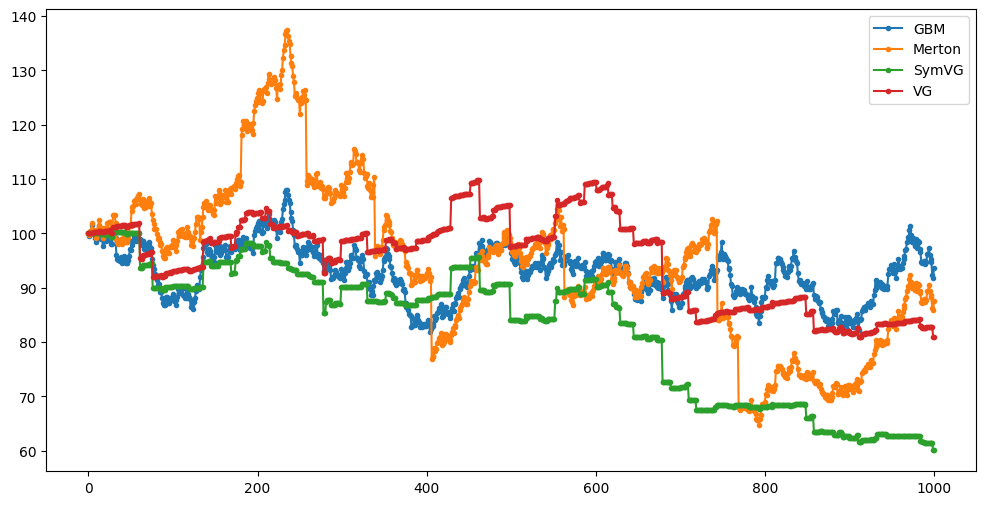

In [9]:
np.random.seed(14564291)

s1 = np.zeros(m + 1)
s2 = np.zeros(m + 1)
s3 = np.zeros(m + 1)
s4 = np.zeros(m + 1)

s1[0] = s0
s2[0] = s0
s3[0] = s0
s4[0] = s0

for i in np.arange(1, m+1):

    J = 0
    if lda != 0:
        nJ = np.random.poisson(lda*dt)
        # is there any jump in that interval?
        if nJ > 0:
            for l in range(nJ):
                z = np.random.randn()
                J += eta + delt*z

    # same z for all
    z = np.random.randn()

    # GBM
    s1[i] = s1[i - 1] * np.exp(drift1*dt + sig*np.sqrt(dt)*z)

    # Merton_Jump
    s2[i] = s2[i - 1] * np.exp(drift2*dt + sig*np.sqrt(dt)*z + J)

    # same g for symmetric VG & VG
    g = np.random.gamma(dt/nu, nu)

    # Symmetric Variance Gamma
    s3[i] = s3[i - 1] * np.exp(drift3*dt + sig*np.sqrt(g)*z)

    # Variance Gamma
    s4[i] = s4[i - 1] * np.exp(drift4*dt + sig*np.sqrt(g)*z)

#plot
fig = plt.figure(figsize=(12,6))

plt.plot(s1, '.-')
plt.plot(s2, '.-')
plt.plot(s3, '.-')
plt.plot(s4, '.-')
plt.legend(['GBM', 'Merton', 'SymVG', 'VG'])

plt.show()